Simon retrieved COSMOS catalogs from the morphology and photometry directories of this site: 

https://irsa.ipac.caltech.edu/data/COSMOS/tables/

and put them on NCSA at `/project/shared/data/COSMOS_catalogs/`

For testing star-galaxy separation, there is yet another catalog that seems to be most commonly used.

From https://arxiv.org/abs/1805.02427

>The dataset on which we train the machine learning (ML)
codes  is  the  weak  lensing  catalog  from  HST  ACS  in  the
COSMOS  field (Leauthaud  et  al.  2007),  as  this  provides  a
largely unbiased measurement of all extended and point-like
sources from DES (albeit the star-galaxy mixture is affected
by the specific position in the sky with respect to the Galactic  plane).  In  particular,  the
MU_CLASS parameter  is  used for  this  reference,  defined  in  the  peak  surface  brightness  -
MAG_AUTO space,  which  in  space-based  imaging  shows  very
distinct loci with respect to the same objects viewed through
the atmosphere. This has been used previously in star-galaxy
separation assessments in, e.g., Crocce et al. (2016) and Aihara et al. (2018).

So let's grab that catalog

Leauthaud  et  al.  2007: https://ui.adsabs.harvard.edu/#abs/2007ApJS..172..219L/abstract

Catalog: https://irsa.ipac.caltech.edu/data/COSMOS/tables/photometry/cosmos_acs_iphot_200709.tbl

Documentation: https://irsa.ipac.caltech.edu/data/COSMOS/gator_docs/cosmos_acs_colDescriptions.html

Do a `wget https://irsa.ipac.caltech.edu/data/COSMOS/tables/photometry/cosmos_acs_iphot_200709.tbl`

In [10]:
import os
import glob
import gzip
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Reading the COSMOS HST/ACS weak lensing catalog. Note that the HST/ACS weak lensing catalog is a 1.3G text file. The pandas `read_csv` seems the fastest tool to ingest this catalog. I couldn't get the numpy `getfromtxt` to finish. This same cell was also capable of reading the COSMOS HST/ACS morphology catalog using the numpy rather than pandas functions. Let's concentrate on the weak lensing catalog for now.

In [40]:
#datadir_cosmos = '/project/shared/data/COSMOS_catalogs/'
#infile_cosmos = datadir_cosmos + 'cosmos_morphology_2005.tbl'
datadir_cosmos = '/home/kbechtol/DATA/COSMOS_catalogs/'
infile_cosmos = datadir_cosmos + 'cosmos_acs_iphot_200709.tbl'

reader = open(infile_cosmos, 'r')
lines = reader.readlines()
reader.close()

index = 0
while index < 1000:
    if lines[index][0] != '\\':
        break
    index += 1
#print('index', index)
names = np.core.defchararray.strip(lines[index].split('|')[1:-1]).tolist()
#print(names)
dtype = np.core.defchararray.strip(lines[index + 1].split('|')[1:-1])
#dtype = np.where(dtype == 'int', int, float)
dtype = np.where(dtype == 'int', int, float)
#print(dtype)
while index < 1000:
    if not lines[index][0] in ('\\', '|'):
        break
    index += 1
#print('index', index)
#print(lines[index])

print('Reading file...')
# http://akuederle.com/stop-using-numpy-loadtxt
#data_cosmos = np.genfromtxt(infile_cosmos, comments='\\', delimiter=None, skip_header=index, names=names, dtype=dtype)
#data_cosmos = pd.read_csv(infile_cosmos, delimiter='', skiprows=index, names=names)# dtype=dtype)
df_cosmos = pd.read_csv(infile_cosmos, sep='\s+', skiprows=index, names=names, na_values='null')# dtype=dtype)

Reading file...


In [41]:
#lines[index].split()
#data_cosmos['id'][0]
print(df_cosmos.shape)
df_cosmos
#data_morphology.dtype.names

(1177274, 60)


,number,mag_iso,magerr_iso,mag_isocor,magerr_isocor,mag_petro,magerr_petro,petro_radius,mag_aper,magerr_aper,...,cxy_image,elongation,class_star,field,mu_class,x,y,z,spt_ind,cntr
0,7,25.011913,0.037696,24.427568,0.055698,24.419535,0.072279,7.259999,25.088701,0.043149,...,-0.105052,2.493634,0.000160,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860774,0.507116,0.043610,220212312,1
1,8,24.389151,0.025388,24.144999,0.037031,23.661472,0.051026,10.560000,24.335344,0.026037,...,-0.018387,1.150967,0.019758,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860765,0.507144,0.043452,220212312,2
2,10,23.956926,0.018109,23.787031,0.024735,23.604761,0.032705,7.259999,24.030365,0.018158,...,0.007276,1.101711,0.281359,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860767,0.507134,0.043531,220212312,3
3,16,24.887758,0.028632,24.682690,0.040656,24.469540,0.053768,7.259999,24.735888,0.031832,...,0.042768,1.277476,0.087045,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860758,0.507151,0.043511,220212312,4
4,17,20.882307,0.002660,20.873367,0.002704,20.902988,0.002576,3.500000,20.924545,0.002550,...,0.001963,1.025627,0.992961,acs_I_095751+0228_unrot_sci_12.fits,2,-0.860757,0.507149,0.043553,220212312,5
5,21,23.694363,0.017849,23.424170,0.026065,23.275284,0.032172,6.599999,24.432056,0.025409,...,-0.048445,3.646455,0.000417,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860738,0.507186,0.043498,220212312,6
6,22,24.341871,0.024565,24.032614,0.036572,23.578505,0.044696,9.240000,24.491474,0.026328,...,-0.055762,1.864077,0.000318,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860738,0.507187,0.043500,220212312,7
7,23,24.523901,0.029127,24.052286,0.043844,23.714767,0.055619,9.240000,24.854565,0.035715,...,-0.076338,3.112289,0.000172,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860734,0.507197,0.043444,220212312,8
8,24,24.017153,0.014629,23.962391,0.016682,23.968294,0.017766,3.960000,23.976557,0.017275,...,-0.005030,1.023215,0.974392,acs_I_095751+0228_unrot_sci_12.fits,2,-0.860739,0.507179,0.043558,220212312,9
9,25,22.990147,0.013251,22.712029,0.019367,22.541523,0.026930,7.919999,23.851458,0.016373,...,-0.000769,1.249470,0.000487,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860707,0.507288,0.042932,220212312,10


Now let's write out to a more convient format. I had to do a `pip install --user tables`

In [42]:
print(infile_cosmos)
outfile_cosmos = infile_cosmos.replace('.tbl', '.h5')
print(outfile_cosmos)
df_cosmos.to_hdf(outfile_cosmos, 'df')
#help(data_cosmos.to_hdf)

/home/kbechtol/DATA/COSMOS_catalogs/cosmos_acs_iphot_200709.tbl
/home/kbechtol/DATA/COSMOS_catalogs/cosmos_acs_iphot_200709.h5


Now we can just load the HDF5 file.

In [43]:
df_cosmos = pd.read_hdf(outfile_cosmos, 'df')

In [44]:
df_cosmos.columns

Index(['number', 'mag_iso', 'magerr_iso', 'mag_isocor', 'magerr_isocor',
       'mag_petro', 'magerr_petro', 'petro_radius', 'mag_aper', 'magerr_aper',
       'mag_auto', 'magerr_auto', 'mag_best', 'magerr_best', 'flux_auto',
       'fluxerr_auto', 'kron_radius', 'background', 'threshold', 'flux_max',
       'flux_radius', 'isoarea_image', 'x_image', 'y_image', 'xmin_image',
       'ymin_image', 'xmax_image', 'ymax_image', 'xpeak_image', 'ypeak_image',
       'alphapeak_j2000', 'deltapeak_j2000', 'a_image', 'b_image', 'ra', 'dec',
       'theta_image', 'mu_threshold', 'mu_max', 'isoarea_world', 'x_world',
       'y_world', 'a_world', 'b_world', 'theta_world', 'flags', 'fwhm_image',
       'fwhm_world', 'cxx_image', 'cyy_image', 'cxy_image', 'elongation',
       'class_star', 'field', 'mu_class', 'x', 'y', 'z', 'spt_ind', 'cntr'],
      dtype='object')

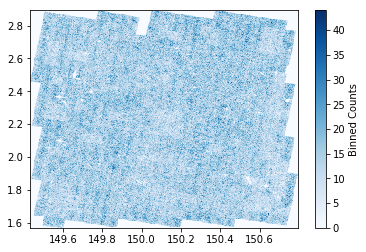

In [45]:
# Sanity check plot
plt.figure()
#plt.scatter(df_cosmos['ra'], df_cosmos['dec'], marker='.', s=1)
plt.hist2d(df_cosmos['ra'], df_cosmos['dec'], bins=(300, 300), cmap='Blues')
plt.colorbar(label='Binned Counts')
plt.show()

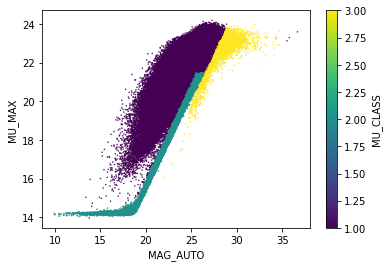

In [49]:
# Another sanity check plot
plt.figure()
plt.scatter(df_cosmos['mag_auto'], df_cosmos['mu_max'], c=df_cosmos['mu_class'], marker='.', s=1)
#plt.hist2d(df_cosmos['mag_auto'], df_cosmos['dec'], bins=(300, 300), cmap='Blues')
plt.colorbar(label='MU_CLASS')
plt.xlabel('MAG_AUTO')
plt.ylabel('MU_MAX')
plt.show()

Reading the COSMOS photometry catalogs

In [108]:
infiles_cosmos = sorted(glob.glob(datadir_cosmos + 'cosmos_phot_20081101_*.tbl.gz'))
print(infiles_cosmos)

for infile in infiles_cosmos:
    reader = gzip.open(infile)
    lines = reader.readlines()
    reader.close()
    break

['/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_1.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_2.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_3.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_4.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_5.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_6.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_7.tbl.gz']


In [113]:
lines[0]

b'|                                    ID|                               ID_2006|                                  tile|                                    ra|                                   dec|                               pixel_x|                               pixel_y|                                i_fwhm|                                 i_max|                                i_star|                                i_auto|                           auto_offset|                             auto_flag|                                     u|                                    du|                                     B|                                    dB|                                     V|                                    dV|                                     g|                                    dg|                                     r|                                    dr|                                     i|                                    di|                      

# HSC Catalogs

Information available here: https://confluence.lsstcorp.org/display/DM/S18+HSC+PDR1+reprocessing

The output repos are: 

    /datasets/hsc/repo/rerun/DM-13666/UDEEP/
    /datasets/hsc/repo/rerun/DM-13666/DEEP/
    /datasets/hsc/repo/rerun/DM-13666/WIDE/
    
HSC SSP PDR1 data, as described in DMTR-31 Sect 1; this is the same as S17B HSC PDR1 reprocessing. It includes 5654 visits in 7 bands and 3 layers (386 visits in UDEEP, 668 visits in DEEP, and 4600 visits in WIDE). It has 11 tracts in UDEEP, 37 tracts in DEEP, and 91 tracts in WIDE. The tract IDs can be found in https://hsc-release.mtk.nao.ac.jp/doc/index.php/database/ (except tract=9572) or the first table on the S17B HSC PDR1 reprocessing page. 

The first thing we need to do is know what tracts and patches overlap with the COSMOS field. One way to do this is to find the center of each patch using the BBox from the deepCoadd calexp. Unfortunately, this is quite slow (~1 sec per patch) and there are ~6000 patches in the WIDE layer.

A much better approach is to get the @deepCoadd_skyMap@ object from the butler.

In [53]:
import lsst.daf.persistence as daf_persistence

In [437]:
depth = 'DEEP'
butler = daf_persistence.Butler('/datasets/hsc/repo/rerun/DM-13666/%s/'%(depth))

This is a kludge to get the available patches in the dataset

In [438]:
infiles = glob.glob('/datasets/hsc/repo/rerun/DM-13666/%s/deepCoadd-results/HSC-I/*/*/calexp-*.fits'%(depth))
print(len(infiles))

1303


The next cell finds the center of each patch

In [439]:
def getPatchCenter(skymap, tract, patch):
    # Find the center of the patch BBox in pixel coordinates and convert with tract WCS
    patch = list(map(int, patch.split(',')))
    wcs = s.generateTract(tract).getWcs()
    bbox = s.generateTract(tract).getPatchInfo(patch).getInnerBBox()
    sky = wcs.pixelToSky(np.mean((bbox.getBeginX(), bbox.getEndX())), 
                         np.mean((bbox.getBeginY(), bbox.getEndY())))
    return sky[0].asDegrees(), sky[1].asDegrees()

tract_array = []
patch_array = []
for ii in range(0, len(infiles)):
    parts = infiles[ii].split('/')
    tract_array.append(int(parts[-3]))
    patch_array.append(parts[-2])

print('Found %i patches'%(len(patch_array)))
    
skymap = butler.get('deepCoadd_skyMap')
    
ra_center_array = np.tile(0., len(patch_array))
dec_center_array = np.tile(0., len(patch_array))
for ii, (tract, patch) in enumerate(zip(tract_array, patch_array)):
    ra_center_array[ii], dec_center_array[ii] = getPatchCenter(skymap, tract, patch)
    
# Assemble in pandas data frame    
data = {'tract': tract_array,
        'patch': patch_array, 
        'ra_center': ra_center_array, 
        'dec_center': dec_center_array}
df_tract_patch = pd.DataFrame(data=data)

Found 1303 patches


(0.0, 4.0)

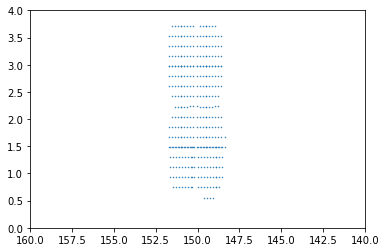

In [440]:
# Sanity check plot
plt.figure()
plt.scatter(df_tract_patch['ra_center'], df_tract_patch['dec_center'], marker='.', s=1)
# Centered on COSMOS field
plt.xlim(160., 140.)
plt.ylim(0., 4.)

In [441]:
# Save the patch coordinates (although the calculation with improved method above is not fast enough that this isn't really an issue anymore)
outfile_tract_patch = '/home/kbechtol/DATA/hsc/rerun/DM-13666/%s/hsc_%s_tract_patch_coord.h5'%(depth, depth.lower())
print(outfile_tract_patch)
print(len(ra_center_array))
df_tract_patch.to_hdf(outfile_tract_patch, 'df')

/home/kbechtol/DATA/hsc/rerun/DM-13666/DEEP/hsc_deep_tract_patch_coord.h5
1303


In [442]:
df_tract_patch_read = pd.read_hdf(outfile_tract_patch, 'df')

(0.0, 4.0)

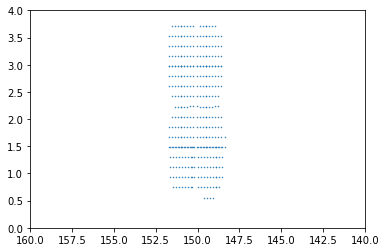

In [444]:
# Make sure the readout of the tract patch metadata file looks reasonable
plt.figure()
plt.scatter(df_tract_patch_read['ra_center'], df_tract_patch_read['dec_center'], marker='.', s=1)
# Centered on COSMOS field
plt.xlim(160., 140.)
plt.ylim(0., 4.)

Determine which patches overlap with COSMOS field

Need an angsep function

Need to merge the HSC patch-level catalogs

In [511]:
# I'm guessing there is an LSST module for this?

def angsep(lon1,lat1,lon2,lat2):
    """
    Angular separation (deg) between two sky coordinates.
    Borrowed from astropy (www.astropy.org)
    Notes
    -----
    The angular separation is calculated using the Vincenty formula [1],
    which is slighly more complex and computationally expensive than
    some alternatives, but is stable at at all distances, including the
    poles and antipodes.
    [1] http://en.wikipedia.org/wiki/Great-circle_distance
    """
    lon1,lat1 = np.radians([lon1,lat1])
    lon2,lat2 = np.radians([lon2,lat2])
    
    sdlon = np.sin(lon2 - lon1)
    cdlon = np.cos(lon2 - lon1)
    slat1 = np.sin(lat1)
    slat2 = np.sin(lat2)
    clat1 = np.cos(lat1)
    clat2 = np.cos(lat2)

    num1 = clat2 * sdlon
    num2 = clat1 * slat2 - slat1 * clat2 * cdlon
    denominator = slat1 * slat2 + clat1 * clat2 * cdlon

    return np.degrees(np.arctan2(np.hypot(num1,num2), denominator))

In [500]:
selection = angsep(np.median(df_cosmos['ra']), np.median(df_cosmos['dec']), df_tract_patch['ra_center'], df_tract_patch['dec_center']) < 0.4
print(np.sum(selection))

15


In [513]:
# Is there away to select object catalogs from multiple patches simultaneously with the butler?

coadd_forced_src_array = []
for ii in np.nonzero(selection)[0]:
    tract, patch = df_tract_patch['tract'][ii], df_tract_patch['patch'][ii] 
    print(tract, patch)
    dataid = {'filter':'HSC-I', 'tract':tract, 'patch':patch}
    coadd_forced_src = butler.get('deepCoadd_forced_src', dataId=dataid)
    data = {'ra': np.degrees(coadd_forced_src['coord_ra']),
            'dec': np.degrees(coadd_forced_src['coord_dec'])}
    # Should do a detect is primary selection here
    coadd_forced_src_array.append(pd.DataFrame(data=data))

#dir(coadd_forced_src)
df_hsc = pd.concat(coadd_forced_src_array)
#df_coadd_forced_src_array

9813 5,6
9813 5,2
9813 6,3
9813 4,6
9813 5,3
9813 6,4
9813 4,3
9813 5,4
9813 3,3
9813 4,4
9813 3,4
9813 4,5
9813 6,5
9813 3,5
9813 5,5


In [505]:
np.max(df_hsc['ra']), np.min(df_hsc['ra']), np.max(df_hsc['dec']), np.min(df_hsc['dec']), np.all(np.isfinite(df_hsc['ra'])), np.all(np.isfinite(df_hsc['dec']))

(150.5326299143126,
 149.7763968402938,
 2.702530453007138,
 1.760293871624066,
 True,
 True)

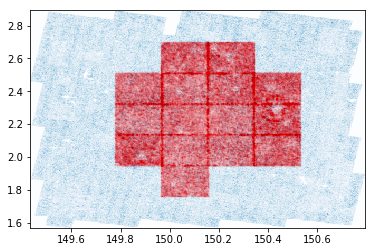

In [517]:
# Sanity check plot
plt.figure()
#plt.scatter(df_cosmos['ra'], df_cosmos['dec'], marker='.', s=1)
bins = plt.hist2d(df_cosmos['ra'], df_cosmos['dec'], bins=(300, 300), cmap='Blues', alpha=0.5)[1:]
#print(bins)
#plt.colorbar(label='Binned Counts')
#plt.hist2d(df_hsc['ra'], df_hsc['dec'], bins=(100, 100), cmap='Reds', alpha=0.5)
plt.scatter(df_hsc['ra'], df_hsc['dec'], c='red', marker='.', s=1, alpha=0.01)
#plt.hist2d(df_hsc['ra'], df_hsc['dec'], bins=(300, 300), cmap='Blues', alpha=0.5)
plt.show()

# Code scraps

Saved for reference

In [260]:
"""
x_corners = []
y_corners = []
ra_corners = []
dec_corners = []
corners = coadd_calexp.getBBox().getCorners()
for corner in corners:
    x_corners.append(corner[0])
    y_corners.append(corner[1])
    sky = wcs.pixelToSky(corner[0], corner[1])
    ra_corners.append(sky[0].asDegrees())
    dec_corners.append(sky[1].asDegrees())
print(ra_corners)
print(dec_corners)

sky = wcs.pixelToSky(np.mean(x_corners), np.mean(y_corners))
ra_center, dec_center = sky[0].asDegrees(), sky[1].asDegrees()
"""

[150.532712400652, 150.3366505926636, 150.33666241447355, 150.5327503478152]
[1.946763271526029, 1.9467849678428848, 2.1427357958532447, 2.1427119132485557]


In [246]:
#dir(butler)
#subset = butler.subset('deepCoadd_calexp', **{'filter':'HSC-I', 'tract': 9813, 'patch':'4,4'})
#subset = butler.subset('deepCoadd_calexp', **{'filter':'HSC-I', 'tract': 9813, 'patch':'4,4'})
#len(subset.cache)

#dataid = {'filter':'HSC-I', 'tract': 9813, 'patch':'3,3'}
#coadd_calexp = butler.get('deepCoadd_calexp', **dataid)
#coadd_forced_src = butler.get('deepCoadd_forced_src', dataId=dataid)

In [313]:
tract_array = []
patch_array = []
for ii in range(0, len(infiles)):
    parts = infiles[ii].split('/')
    tract_array.append(int(parts[-3]))
    patch_array.append(parts[-2])

#print(tract_array)
#print(patch_array)
    
ra_center_array = []
dec_center_array = []
count = 0
for infile, tract, patch in zip(infiles, tract_array, patch_array):
    print(count, len(tract_array), tract, patch)
    
    # I think this is the more proper way
    dataid = {'filter':'HSC-I', 'tract':tract, 'patch':patch}
    coadd_calexp = butler.get('deepCoadd_calexp', **dataid)
    wcs = coadd_calexp.getWcs()
    # This is center of tract rather than center of patch
    #ra_center, dec_center = wcs.getSkyOrigin()[0].asDegrees(), wcs.getSkyOrigin()[1].asDegrees()
    
    x_corners = []
    y_corners = []
    corners = coadd_calexp.getBBox().getCorners()
    for corner in corners:
        x_corners.append(corner[0])
        y_corners.append(corner[1])
    sky = wcs.pixelToSky(np.mean(x_corners), np.mean(y_corners))
    ra_center, dec_center = sky[0].asDegrees(), sky[1].asDegrees()
    
    # I've checked that this produces the same result and is much faster
    # This is center of tract rather than center of patch
    #r = pyfits.open(infile)
    #ra_center, dec_center = r[1].header['CRVAL1'], r[1].header['CRVAL2']
    
    print(ra_center, dec_center)
    #print(ra_center_alt, dec_center_alt)
    ra_center_array.append(ra_center)
    dec_center_array.append(dec_center)
    count += 1

0 6905 8765 8,8
33.469619956507266 -2.9744422870697353
1 6905 8765 0,8
34.960085391824336 -2.9744423185601447
2 6905 8765 3,0
34.40207063878695 -4.463252674452619
3 6905 8765 0,4
34.96071459240323 -3.7186707266763372
4 6905 8765 0,0
34.96134485632225 -4.462899142217089
5 6905 8765 4,1
34.21485263562103 -4.278967102482363
6 6905 8765 1,5
34.77589765755776 -3.532150021332844
7 6905 8765 5,6
34.02787193510732 -3.345639102645278
8 6905 8765 5,2
34.027713463609324 -4.092291222349099
9 6905 8765 2,6
34.588810129839004 -3.3455857924092385
10 6905 8765 6,7
33.84097433735221 -3.1589356356312175
11 6905 8765 6,3
33.84065755847283 -3.905567891184811
12 6905 8765 7,8
33.65416229847793 -2.9745512819211273
13 6905 8765 2,0
34.58928464957489 -4.463181489821061
14 6905 8765 3,1
34.40203146798174 -4.278944359251203
15 6905 8765 0,5
34.96055669936392 -3.532020535726406
16 6905 8765 4,6
34.21485266038462 -3.345656882177876
17 6905 8765 4,2
34.214852640577945 -4.09231298206267
18 6905 8765 1,6
34.77577890

In [279]:
"""
plt.figure()
plt.hist2d(np.degrees(coadd_forced_src['coord_ra']), np.degrees(coadd_forced_src['coord_dec']), bins=(200, 200), cmap='Blues')
#plt.colorbar(label='Binned Counts')
plt.scatter(ra_origin, dec_origin, c='red', s=300)
plt.scatter(ra_center, dec_center, c='blue', s=300)
plt.scatter(ra_corners, dec_corners, c=np.arange(4), s=300, cmap='jet')
plt.colorbar()
plt.xlim(151., 149.)
plt.ylim(0., 4.)
plt.show()
"""

"\nplt.figure()\nplt.hist2d(np.degrees(coadd_forced_src['coord_ra']), np.degrees(coadd_forced_src['coord_dec']), bins=(200, 200), cmap='Blues')\n#plt.colorbar(label='Binned Counts')\nplt.scatter(ra_origin, dec_origin, c='red', s=300)\nplt.scatter(ra_center, dec_center, c='blue', s=300)\nplt.scatter(ra_corners, dec_corners, c=np.arange(4), s=300, cmap='jet')\nplt.colorbar()\nplt.xlim(151., 149.)\nplt.ylim(0., 4.)\nplt.show()\n"

In [402]:
def getPatchCenter(skymap, tract, patch):
    patch = list(map(int, patch.split(',')))
    wcs = s.generateTract(tract).getWcs()
    bbox = s.generateTract(tract).getPatchInfo(patch).getInnerBBox()
    sky = wcs.pixelToSky(np.mean((bbox.getBeginX(), bbox.getEndX())), 
                         np.mean((bbox.getBeginY(), bbox.getEndY())))
    return sky[0].asDegrees(), sky[1].asDegrees()
    
getPatchCenter(s, 9813, '3,3')

(150.43467114000234, 2.0447747677310146)